In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#### Dog Breed Identification
Determine the breed of a dog in an image
Intro to Dataset : 
 - You are provided with a training set and a test set of images of dogs. 
 - Each image has a filename that is its unique id. 
 - The dataset comprises 120 breeds of dogs. 
 - https://www.kaggle.com/c/dog-breed-identification
 

In [45]:
df = pd.read_csv('labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [157]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,4b5b818436bd7a7a83fbb02b9880727c,scottish_deerhound
freq,1,126


In [150]:
def show_six_sample_images(is_subset = False, subset = []):
    samples = []
    for i in range(500):
        if len(samples) == 6:
            break
        file = random.choice(os.listdir(os.getcwd()+"\\train"))
        if not is_subset:
            if file not in samples:
                samples.append(file)

        if is_subset:
            if file not in samples:
                if file[:-4] in subset:
                    samples.append(file)
    fig, ax = plt.subplots(3,2, figsize= (6,6))
    idx = 0
    for i in range(3):
        for j in range(2):
            ax[i, j].imshow(plt.imread(os.getcwd()+"\\train\\"+samples[idx]))   
            ax[i, j].set_xlabel(df[df['id']==samples[idx][:-4]].values[0][1])
            ax[i, j].set_yticks([])
            ax[i, j].set_xticks([])
            idx = idx+1

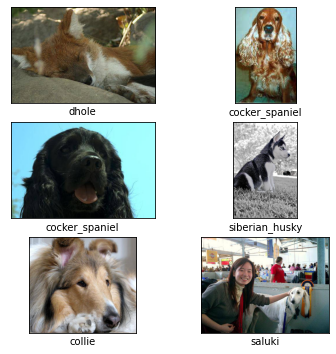

In [151]:
show_six_sample_images()

**Breeds to Predict Scores for :** 
- beagle, chihuahua, doberman,french_bulldog,  golden_retriever, malamute, pug, saint_bernard, scottish_deerhound, tibetan_mastiff.


In [152]:
target_breeds = ['beagle', 'chihuahua', 'doberman','french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound', 'tibetan_mastiff']
target_breeds

['beagle',
 'chihuahua',
 'doberman',
 'french_bulldog',
 'golden_retriever',
 'malamute',
 'pug',
 'saint_bernard',
 'scottish_deerhound',
 'tibetan_mastiff']

In [153]:
df_subset = df[df['breed'].isin(target_breeds)]
df_subset.head()

,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
20,008b1271ed1addaccf93783b39deab45,doberman
25,00a366d4b4a9bbb6c8a63126697b7656,golden_retriever
37,0100f55e4f0fe28f2c0465d3fc4b9897,golden_retriever


In [154]:
subset_ids = list(df_subset['id'].values)

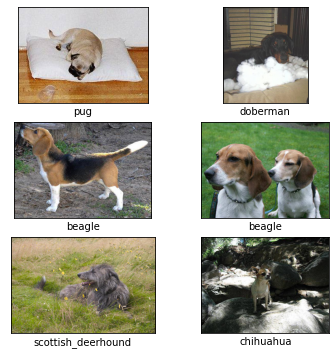

In [155]:
show_six_sample_images(is_subset = True, subset = subset_ids)

In [285]:
import copy
import tqdm
import tensorflow as tf

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,  Activation, BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, InputLayer, Input, Add, ZeroPadding2D, Flatten
from keras.utils import to_categorical
from keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

## Preprocessing

In [174]:
train_datagen = 
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("train/")

In [212]:
df_subset['breed'].values[0]

'golden_retriever'

In [222]:
train_img_data = []
img_size = 224
for idx, i in enumerate(df_subset['id']):
    img_loc = os.getcwd()+"\\train\\"+i+".jpg"
    img = cv2.imread(img_loc)[...,::-1]
    resized_img = cv2.resize(img, (img_size, img_size))
#     img_data.append([resized_img, df_subset['breed'].values[idx]])
    train_img_data.append(resized_img)

In [269]:
train_img_labels = df_subset['breed'].values
from collections import Counter
Counter(train_img_labels)

Counter({'golden_retriever': 67,
         'scottish_deerhound': 126,
         'doberman': 74,
         'malamute': 81,
         'chihuahua': 71,
         'pug': 94,
         'saint_bernard': 84,
         'beagle': 105,
         'french_bulldog': 70,
         'tibetan_mastiff': 69})

In [223]:
train_img_data = np.array(train_img_data)
img_array.shape

(841, 224, 224, 3)

In [216]:
df_new = pd.DataFrame(img_array)
df_new.head()

,0,1
0,"[[[84, 86, 83], [84, 86, 83], [84, 86, 83], [8...",golden_retriever
1,"[[[5, 6, 0], [7, 8, 0], [10, 11, 3], [12, 13, ...",scottish_deerhound
2,"[[[121, 123, 115], [113, 117, 108], [117, 126,...",doberman
3,"[[[139, 57, 72], [115, 80, 82], [153, 137, 134...",golden_retriever
4,"[[[12, 33, 47], [21, 31, 42], [28, 38, 48], [2...",golden_retriever


Counter({'golden_retriever': 67,
         'scottish_deerhound': 126,
         'doberman': 74,
         'malamute': 81,
         'chihuahua': 71,
         'pug': 94,
         'saint_bernard': 84,
         'beagle': 105,
         'french_bulldog': 70,
         'tibetan_mastiff': 69})

In [384]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(train_img_labels)
# label_encoded
train_label_ohe = to_categorical(label_encoded, num_classes = 10,)
train_label_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_img_data, train_label_ohe, test_size = 0.2, stratify = train_label_ohe)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((672, 224, 224, 3), (169, 224, 224, 3), (672, 10), (169, 10))

In [248]:
batch_size = 64

train_generate = ImageDataGenerator(
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15
)

valid_generate = ImageDataGenerator()

train_generated = train_generate.flow(X_train, y_train, batch_size = batch_size)
valid_generated = valid_generate.flow(X_valid, y_valid, batch_size = batch_size)

### ResNet50

In [344]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [345]:
model50 = ResNet50(
    input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [346]:
model50.trainable = False

In [347]:
model = tf.keras.Sequential([model50,
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dropout(0.2), 
                                 tf.keras.layers.Dense(10, activation="softmax")                                     
                                ])

In [348]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [349]:
epochs = 50
res50 = model.fit(train_generated, 
                                  epochs=epochs, 
                                  steps_per_epoch=X_train.shape[0]/batch_size, 
                                  validation_steps=X_valid.shape[0]/batch_size, 
                                  validation_data=valid_generated, )

Epoch 1/50
10/10 [==============================] - 193s 18s/step - loss: 4.8309 - accuracy: 0.1403 - val_loss: 3.5316 - val_accuracy: 0.1953
Epoch 2/50
10/10 [==============================] - 186s 18s/step - loss: 4.2981 - accuracy: 0.1580 - val_loss: 2.8991 - val_accuracy: 0.2663
Epoch 3/50
10/10 [==============================] - 188s 18s/step - loss: 3.4718 - accuracy: 0.2366 - val_loss: 2.3874 - val_accuracy: 0.3609
Epoch 4/50
10/10 [==============================] - 191s 18s/step - loss: 2.9666 - accuracy: 0.3293 - val_loss: 2.0364 - val_accuracy: 0.4379
Epoch 5/50
10/10 [==============================] - 188s 18s/step - loss: 2.5492 - accuracy: 0.3900 - val_loss: 1.7246 - val_accuracy: 0.5089
Epoch 6/50
10/10 [==============================] - 185s 18s/step - loss: 2.3676 - accuracy: 0.4180 - val_loss: 1.5020 - val_accuracy: 0.6036
Epoch 7/50
10/10 [==============================] - 185s 18s/step - loss: 2.0655 - accuracy: 0.4691 - val_loss: 1.3427 - val_accuracy: 0.6213
Epoch 

In [370]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [365]:
predictions = model.predict_classes(X_valid)
# predictions = predictions.reshape(1,-1)[0]

In [367]:
y_preds =  to_categorical(predictions, num_classes = 10,)
y_preds

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [371]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.77      0.71      0.74        14
           2       0.93      0.87      0.90        15
           3       0.90      0.64      0.75        14
           4       1.00      0.93      0.96        14
           5       0.88      0.94      0.91        16
           6       0.67      0.84      0.74        19
           7       1.00      0.94      0.97        17
           8       0.92      0.92      0.92        25
           9       0.86      0.86      0.86        14

   micro avg       0.88      0.88      0.88       169
   macro avg       0.88      0.87      0.87       169
weighted avg       0.88      0.88      0.88       169
 samples avg       0.88      0.88      0.88       169



In [372]:
print(accuracy_score(y_valid, y_preds))

0.8757396449704142


#### Predictions on Test Data

In [380]:
test_img_data = []
img_size = 224
test_list = os.listdir(os.getcwd()+"\\test")
for idx, i in enumerate(test_list):
    img_loc = os.getcwd()+"\\test\\"+i
    img = cv2.imread(img_loc)[...,::-1]
    resized_img = cv2.resize(img, (img_size, img_size))
    test_img_data.append(resized_img)

In [381]:
test_img_data = np.array(test_img_data)
test_img_data.shape

(10357, 224, 224, 3)

In [382]:
preds = model.predict_classes(test_img_data)

In [388]:
preds

array([4, 5, 8, ..., 8, 4, 8], dtype=int64)

In [389]:
test_labels = le.inverse_transform(preds)
test_labels

array(['golden_retriever', 'malamute', 'scottish_deerhound', ...,
       'scottish_deerhound', 'golden_retriever', 'scottish_deerhound'],
      dtype=object)